# Breast Cancer Prediction Using Machine Learning 

Supervised learning algorithms are ubiquitously used in almost all industries to enhance decision making. I have used supervised learning techniques while working for a CPG client in Mu Sigma. Joining the MS in Business Analytics course at Carlson School of Management helped me learn various techniques in depth for both classification and regression like Linear Regression, Logistict Regression, SVM, K-NN, Neural Networks and ensemble models. 

So far, I have worked with CPG, Retail, Entertainment and hospitality clients. One of the industries I have explored least is medical and healthcare industries. One reason why the application here is so important is because predictive analytics is exactly doing what doctors have been doing on an extremely large scale.

I have used publically available data on Breast Cancer. This has been taken from the following website https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)

I am leveraging all the techniques that I have learnt so far to predict breast cancer based on information extracted from breast mass. 

In [176]:
import warnings
warnings.filterwarnings('ignore')
# All libraries imported will be displayed here 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn import datasets,linear_model, neighbors,ensemble,tree,model_selection,preprocessing,metrics
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.tree import DecisionTreeClassifier
import scikitplot as skplt
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
import keras
from keras.models import Sequential
from keras.datasets import mnist
from keras.layers import Dense
from keras.utils import np_utils
from keras.wrappers.scikit_learn import KerasRegressor,KerasClassifier

The features in the dataset are taken from a digitized image of a fine needle aspirate of breast mass. They describe characteristics of the cell nuclei present in the image.<br>

Our target variable is diagnosis, that is whether the tumor is malignant or benign 
1) Diagnosis (M = malignant, B = benign)<br>

The predictor variables are calculated for each cell nucleus and contains information like :- <br>

a) radius (mean of distances from center to points on the perimeter)<br>
b) texture (standard deviation of gray-scale values)<br>
c) perimeter<br>
d) area<br>
e) smoothness (local variation in radius lengths)<br>
f) compactness (perimeter^2 / area - 1.0)<br>
g) concavity (severity of concave portions of the contour)<br>
h) concave points (number of concave portions of the contour)<br>
i) symmetry<br>
j) fractal dimension ("coastline approximation" - 1)<br>

We have totally 30 features in our dataset.<br>

First lets import the dataset and view few rows of the data

In [177]:
wdbc_data = pd.read_csv("wdbc.data", header = None)

In [178]:
wdbc_data.head()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [179]:
del wdbc_data[0] #Since this is an id and we do not require this

In [180]:
#Since our target variable is "M" for malignant and "B" for "Benign", we need to transform them into binary values,
#here we are using 1 for malign and 0 for benign

In [181]:
wdbc_data[1] = wdbc_data[1].map({'M':1,'B':0})

Dividing the dataset into test and train for prediction with 0.7:0.3 split

In [182]:
wdbc_X = wdbc_data.drop(1, axis = 1)
wdbc_Y = wdbc_data[1]
seed = 143
X_train, X_test, Y_train, Y_test = train_test_split(wdbc_X, wdbc_Y, test_size=0.3, random_state = seed)

### DECISION TREES

Decision trees generally tend to parition customers into subgroups so that they are less impure. One of the most common criterion used for spiltting is the information gain. We need more information to be gained as we build the tree. It is one of the most commonly used algorithm because of its simplicity and ease to understand. Decision trees build orthogonal boundaries while splitting the data and therefore, works well if the data is orthogonally seperable.

Now we are going to run a Decision Tree Classifier.

In order to select best hyper parameter, I have used nested cross validation. We are going to try the following hyper parameters: <br>
1. Max depth values between 1 and 20 
2. Min impurity decrease of 0.1 and 0.2 i.e. node will be split if the split creates a decrease of the impurity greater than or equal to this value
3. Gini impurity score is used  as a criterion because it is a classification problem here



In [183]:
model_type = tree.DecisionTreeClassifier()
# Tune hyper-parameters using GridSearch
parameters = {'max_depth': [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20],
              'criterion': ['gini'],
              'min_impurity_decrease': [0.1,0.2]}

model = GridSearchCV(estimator = model_type,
                      param_grid = parameters,
                      scoring="accuracy",
                      n_jobs=4,
                      iid=True,
                      cv=10)
model.fit(X_train,Y_train)
print("Best Score:",model.best_score_)
print("Best parameters:",model.best_params_)


Best Score: 0.9020100502512562
Best parameters: {'criterion': 'gini', 'max_depth': 2, 'min_impurity_decrease': 0.1}


Once we obtained the best hyper parameter, we will use these hyper paramteres to predict the values in our test dataset

In [184]:
model_final = model.best_estimator_
scores = cross_val_score(model_final, X_test, Y_test, cv=10)
print(scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

[0.94444444 0.94444444 0.76470588 0.82352941 0.88235294 0.94117647
 1.         0.76470588 0.88235294 0.875     ]
Accuracy: 0.88 (+/- 0.15)


In [185]:
dt_accuracy = round(scores.mean(),2)

With the decision tree, we are getting an accuracy of 0.88 and standard deviation of 0.15. 

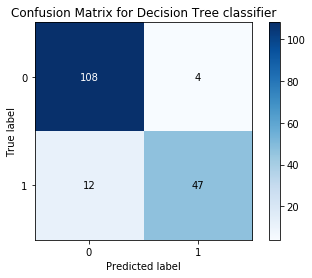

In [186]:
classifier = DecisionTreeClassifier(max_depth = 1, criterion = 'gini', min_impurity_decrease= 0.1)
Y_pred = classifier.fit(X_train, Y_train).predict(X_test)
skplt.metrics.plot_confusion_matrix(Y_test,Y_pred,title = "Confusion Matrix for Decision Tree classifier")

In [187]:
from sklearn.metrics import precision_score,f1_score,recall_score,accuracy_score
print("Precision Score: %0.2f " % precision_score(Y_test,Y_pred))
print("Recall Score: %0.2f " % recall_score(Y_test,Y_pred))
print("F1 Score: %0.2f " % f1_score(Y_test,Y_pred))
dt_precision = round(precision_score(Y_test,Y_pred),2)
dt_recall = round(recall_score(Y_test,Y_pred),2)
dt_f1score = round(f1_score(Y_test,Y_pred),2)
dt_hyper = model.best_params_

Precision Score: 0.92 
Recall Score: 0.80 
F1 Score: 0.85 


### LOGISTIC REGRESSION

Logistic regression is one of the most commonly used classification techniques and is used to estimate the probability of a certain class or event and in our case is whether the patient has cancer or not. Logistic regression can lead to overfitting and in order to reduce this we use regularisation. 

We have two types of regularisation L1 and L2 which can be used to reduce model complexity. These are going to be hyper parameters in our model. Once we understand which regularisatio works better, we can leverage that to predict the test values. 

In [188]:
# Using l1 as penalty 
model_type = LogisticRegression()
parameters = {'penalty' :['l2','l1']}

model = GridSearchCV(estimator = model_type,
                      param_grid = parameters,
                      scoring="accuracy",
                      n_jobs=4,
                      iid=True,
                      cv=10)

model.fit(X_train,Y_train)
print("Best Score:",model.best_score_)
print("Best parameters:",model.best_params_)

Best Score: 0.9472361809045227
Best parameters: {'penalty': 'l1'}


In [189]:
model_final = model.best_estimator_
scores = cross_val_score(model_final, X_test, Y_test, cv=10)
print(scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

[1.         1.         0.82352941 0.94117647 1.         0.94117647
 1.         0.82352941 1.         0.875     ]
Accuracy: 0.94 (+/- 0.14)


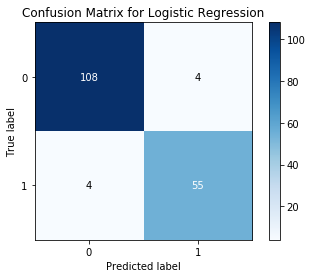

In [190]:
Y_pred = model_final.fit(X_train, Y_train).predict(X_test)
skplt.metrics.plot_confusion_matrix(Y_test,Y_pred,title = "Confusion Matrix for Logistic Regression")

In [191]:
print("Precision Score: %0.2f " % precision_score(Y_test,Y_pred))
print("Recall Score: %0.2f " % recall_score(Y_test,Y_pred))
print("F1 Score: %0.2f " % f1_score(Y_test,Y_pred))

Precision Score: 0.93 
Recall Score: 0.93 
F1 Score: 0.93 


In [192]:
lr_accuracy = round(accuracy_score(Y_test,Y_pred),2)
lr_precision = round(precision_score(Y_test,Y_pred),2)
lr_recall = round(recall_score(Y_test,Y_pred),2)
lr_f1score = round(f1_score(Y_test,Y_pred),2)
lr_hyper = model.best_params_

### CLASSIFICATION USING K NEAREST NEIGHBOURS

In this method, we look at "k" nearest neighbours and classify them as having cancer or not having cancer by taking majority vote. In order to determine nearest neighbours, we look at Euclidian distance. Because we are calculating Euclidian distance, we need to normalise the dataset as it may contain different variables varying in different scales (For example, age and salary). Additionally, while taking majority vote we can consider each neighbour equally or weigh their importance based on the distance. These are additional hyper parameters in the model

In [193]:
KNN = neighbors.KNeighborsClassifier
# Tune hyper-parameters using GridSearch
scaler  = MinMaxScaler()
scaler.fit(X_train)

X_test_KNN = pd.DataFrame(scaler.transform(X_test), columns = X_test.columns)
X_train_KNN = pd.DataFrame(scaler.transform(X_train), columns = X_train.columns)

parameters = {'n_neighbors':[1,3,5,7,9,11,13,15] ,
             'weights': ['uniform', 'distance']}

model = GridSearchCV(estimator=KNN(),
                      param_grid=parameters,
                      scoring="r2",
                      n_jobs=4,
                      iid=True,
                      cv=10)
model.fit(X_train_KNN,Y_train)
print("Best Score:",model.best_score_)
print("Best parameters:",model.best_params_)

Best Score: 0.8619660804020101
Best parameters: {'n_neighbors': 7, 'weights': 'uniform'}


In [194]:
model_final = model.best_estimator_
scores = cross_val_score(model_final, X_test_KNN, Y_test, cv=10)
print(scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

[1.         1.         1.         0.88235294 1.         1.
 1.         0.88235294 1.         0.9375    ]
Accuracy: 0.97 (+/- 0.10)


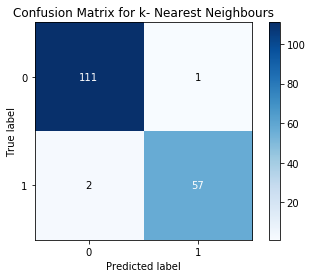

In [195]:
Y_pred = model_final.fit(X_train_KNN, Y_train).predict(X_test_KNN)
skplt.metrics.plot_confusion_matrix(Y_test,Y_pred,title = "Confusion Matrix for k- Nearest Neighbours")

In [196]:
print("Precision Score: %0.2f " % precision_score(Y_test,Y_pred))
print("Recall Score: %0.2f " % recall_score(Y_test,Y_pred))
print("F1 Score: %0.2f " % f1_score(Y_test,Y_pred))

Precision Score: 0.98 
Recall Score: 0.97 
F1 Score: 0.97 


In [197]:
knn_accuracy = round(accuracy_score(Y_test,Y_pred),2)
knn_precision = round(precision_score(Y_test,Y_pred),2)
knn_recall = round(recall_score(Y_test,Y_pred),2)
knn_f1score = round(f1_score(Y_test,Y_pred),2)
knn_hyper = model.best_params_

### GRADIENT BOOSTING CLASSIFIER

Ensemble models are most popular models in Kaggle competitions. They are built under the principle thatcombining results of many modeling techniques will give us better results. One such method where the underlying model is the same but we use different datasets is called boosting. In Gradient Boosting, we use decision trees. In the first iteration, predictions are made and there will be residuals. In the second iteration, we try to predict the residual and reduce error. This is the underlying principle of Gradient Boosting Classifier.

In [198]:
GB = ensemble.GradientBoostingClassifier
# Tune hyper-parameters using GridSearch
params = {'n_estimators': range(1,15), 
          'max_depth':range(1,20) , 
          'min_samples_split': range(2,10)}

model = GridSearchCV(estimator=GB(),
                      param_grid=params,
                      scoring="accuracy",
                      n_jobs=4,
                      iid=True,
                      cv=10)
model.fit(X_train,Y_train)
print("Best Score:",model.best_score_)
print("Best parameters:",model.best_params_)


Best Score: 0.9597989949748744
Best parameters: {'max_depth': 4, 'min_samples_split': 7, 'n_estimators': 14}


In [199]:
model_final = model.best_estimator_
scores = cross_val_score(model_final, X_test, Y_test, cv=10)
print(scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

[1.         0.94444444 0.88235294 0.88235294 1.         0.94117647
 0.88235294 0.82352941 1.         0.875     ]
Accuracy: 0.92 (+/- 0.12)


Precision Score: 1.00 
Recall Score: 0.85 
F1 Score: 0.92 


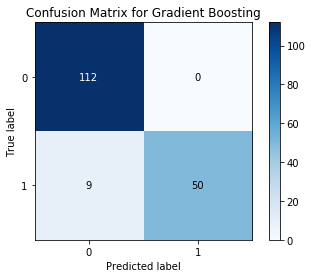

In [200]:
Y_pred = model_final.fit(X_train, Y_train).predict(X_test)
skplt.metrics.plot_confusion_matrix(Y_test,Y_pred,title = "Confusion Matrix for Gradient Boosting")
print("Precision Score: %0.2f " % precision_score(Y_test,Y_pred))
print("Recall Score: %0.2f " % recall_score(Y_test,Y_pred))
print("F1 Score: %0.2f " % f1_score(Y_test,Y_pred))

In [201]:
gb_accuracy = round(accuracy_score(Y_test,Y_pred),2)
gb_precision = round(precision_score(Y_test,Y_pred),2)
gb_recall = round(recall_score(Y_test,Y_pred),2)
gb_f1score = round(f1_score(Y_test,Y_pred),2)
gb_hyper = model.best_params_

### RANDOM FOREST CLASSIFIER

Random Forest Classifiers are ensemble models where each model is trained on a different dataset. We choose different training samples and for each node, we choose m different attributes to find the best split. Trees are often fully grown and are not pruned. 

In [202]:
GB = ensemble.RandomForestClassifier
# Tune hyper-parameters using GridSearch
params = {'n_estimators': range(2,8), 
          'max_depth':range(1,10) , 
          'min_samples_split': range(2,10)}

model = GridSearchCV(estimator=GB(),
                      param_grid=params,
                      scoring="accuracy",
                      n_jobs=4,
                      iid=True,
                      cv=10)
model.fit(X_train,Y_train)
print("Best Score:",model.best_score_)
print("Best parameters:",model.best_params_)

Best Score: 0.964824120603015
Best parameters: {'max_depth': 9, 'min_samples_split': 4, 'n_estimators': 5}


In [203]:
model_final = model.best_estimator_
scores = cross_val_score(model_final, X_test, Y_test, cv=10)
print(scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

[1.         1.         0.76470588 1.         1.         0.94117647
 0.94117647 0.82352941 1.         0.9375    ]
Accuracy: 0.94 (+/- 0.16)


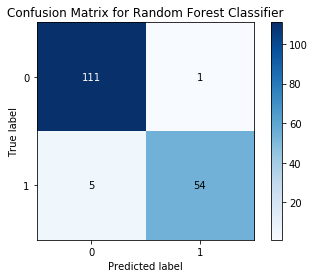

In [204]:
Y_pred = model_final.fit(X_train, Y_train).predict(X_test)
skplt.metrics.plot_confusion_matrix(Y_test,Y_pred,title = "Confusion Matrix for Random Forest Classifier")

In [205]:
print("Precision Score: %0.2f " % precision_score(Y_test,Y_pred))
print("Recall Score: %0.2f " % recall_score(Y_test,Y_pred))
print("F1 Score: %0.2f " % f1_score(Y_test,Y_pred))

Precision Score: 0.98 
Recall Score: 0.92 
F1 Score: 0.95 


In [206]:
rf_accuracy = round(accuracy_score(Y_test,Y_pred),2)
rf_precision = round(precision_score(Y_test,Y_pred),2)
rf_recall = round(recall_score(Y_test,Y_pred),2)
rf_f1score = round(f1_score(Y_test,Y_pred),2)
rf_hyper = model.best_params_

### NEURAL NETWORKS

I'm creating a neural network with 30 epochs, 256 batch sizes below. We are using catgorical cross entropy as the loss function because we are trying to solve a classification problem here. We will get the best parameters and then test our model with that parameter.

In [207]:
def create_model(activation='relu', nb_hidden=10):
    model = Sequential()
    model.add(Dense(nb_hidden, input_dim=30, activation=activation))
    model.add(Dense(2, activation='softmax'))
    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [208]:
activations = ['relu', 'linear','tanh','sigmoid']
nb_hiddens = np.array([100, 200])

param_grid = dict(activation=activations, nb_hidden=nb_hiddens)
model = KerasClassifier(build_fn=create_model, epochs= 30, batch_size= 256, verbose=0)

clf = GridSearchCV(estimator=model,
                   param_grid=param_grid,
                   n_jobs=4,
                   iid=True,
                   cv=10, 
                   scoring= "accuracy")
res = clf.fit(X_train, Y_train)

print(res.best_score_, res.best_params_,res.best_estimator_)

0.9095477386934674 {'activation': 'tanh', 'nb_hidden': 200} <keras.wrappers.scikit_learn.KerasClassifier object at 0x000002281B23F550>


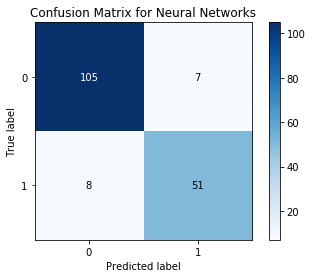

In [209]:
Y_pred = res.best_estimator_.predict(X_test)
skplt.metrics.plot_confusion_matrix(Y_test,Y_pred,title = "Confusion Matrix for Neural Networks")

In [210]:
print("Accuracy: %0.2f " % accuracy_score(Y_test,Y_pred))
print("Precision Score: %0.2f " % precision_score(Y_test,Y_pred))
print("Recall Score: %0.2f " % recall_score(Y_test,Y_pred))
print("F1 Score: %0.2f " % f1_score(Y_test,Y_pred))
print("Accuracy: %0.2f " % accuracy_score(Y_test,Y_pred))

Accuracy: 0.91 
Precision Score: 0.88 
Recall Score: 0.86 
F1 Score: 0.87 
Accuracy: 0.91 


In [211]:
nn_accuracy = round(accuracy_score(Y_test,Y_pred),2)
nn_precision = round(precision_score(Y_test,Y_pred),2)
nn_recall = round(recall_score(Y_test,Y_pred),2)
nn_f1score = round(f1_score(Y_test,Y_pred),2)
nn_hyper = res.best_params_

### CONCLUSION

I have summarised the results of all the models we have run above

In [212]:
from IPython.display import HTML, display

data = [["Classifier","Hyper Parameter","Accuracy","Precision","Recall","F1 Score"],
        ["Decision Tree",dt_hyper,dt_accuracy,dt_precision,dt_recall,dt_f1score],
        ["Logistic Regression",lr_hyper,lr_accuracy,lr_precision,lr_recall,lr_f1score],
        ["K Nearest Neighbors",knn_hyper,knn_accuracy,knn_precision,knn_recall,knn_f1score],
        ["Gradient Boosting",gb_hyper,gb_accuracy,gb_precision,gb_recall,gb_f1score],
        ["Random Forest",rf_hyper,rf_accuracy,rf_precision,rf_recall,rf_f1score],
        ["Neural Netwoks",nn_hyper,nn_accuracy,nn_precision,nn_recall,nn_f1score]]
      
display(HTML(
   '<table><tr>{}</tr></table>'.format(
       '</tr><tr>'.join(
           '<td>{}</td>'.format('</td><td>'.join(str(_) for _ in row)) for row in data)
       )
))

Classifier,Hyper Parameter,Accuracy,Precision,Recall,F1 Score
Decision Tree,"{'criterion': 'gini', 'max_depth': 2, 'min_impurity_decrease': 0.1}",0.88,0.92,0.8,0.85
Logistic Regression,{'penalty': 'l1'},0.95,0.93,0.93,0.93
K Nearest Neighbors,"{'n_neighbors': 7, 'weights': 'uniform'}",0.98,0.98,0.97,0.97
Gradient Boosting,"{'max_depth': 4, 'min_samples_split': 7, 'n_estimators': 14}",0.95,1.0,0.85,0.92
Random Forest,"{'max_depth': 9, 'min_samples_split': 4, 'n_estimators': 5}",0.96,0.98,0.92,0.95
Neural Netwoks,"{'activation': 'tanh', 'nb_hidden': 200}",0.91,0.88,0.86,0.87


As we can see above, K-NN provides the highest accuracy of 0.98. <br>

Since we are trying to predict whether the patient has cancer or not, False Positives and True Negatives play an important role here. We need to look at precision and recall. <br>

Precision is a measure of all instances predicted as positive that were actually correct. In our case, Highest precision is 0.98 and is provided by K-NN, this means that of all the cases that were predicted as postive 98% of them are correct. Which means 2% of cases where identified as positive when they were negative. <br> 

Recall is a measure of actual postive instances that have been predicted correctly by the model. Using K-nn we get a recall of 0.97 which is the best recall when compared to all other models. <br>

F1 score is a harmonic mean of both precision and recall which means a good F1 score means good precision and good recall. From the summarised results above, we see that K-NN is the best classifier. <br> 
